![example](images/director_shot.jpeg)

![example](images/movie_data_erd.jpeg)

# Project Title

**Authors:** Victor Kang
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [3]:
# Here you run your code to explore the data
conn = sqlite3.connect("zippedData/im.db")

In [4]:
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
pd.read_sql("""
SELECT *
FROM movie_basics
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings USING(movie_id)
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [7]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings USING(movie_id)
WHERE movie_id IN 
    (SELECT movie_id
    FROM principals
    WHERE person_id = "nm0000129")
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0790724,Jack Reacher,Jack Reacher,2012,130.0,"Action,Crime,Thriller",7.0,284547.0
1,tt1013743,Knight and Day,Knight and Day,2010,109.0,"Action,Adventure,Comedy",6.3,169840.0
2,tt1229238,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",7.4,428142.0
3,tt1336608,Rock of Ages,Rock of Ages,2012,123.0,"Comedy,Drama,Musical",5.9,69910.0
4,tt1483013,Oblivion,Oblivion,2013,124.0,"Action,Adventure,Sci-Fi",7.0,453966.0
5,tt1592191,"Sex, Drugs & Religion","Sex, Drugs & Religion",2010,72.0,"Comedy,Documentary,News",6.7,94.0
6,tt1631867,Edge of Tomorrow,Edge of Tomorrow,2014,113.0,"Action,Sci-Fi",7.9,546284.0
7,tt1745960,Top Gun: Maverick,Top Gun: Maverick,2020,NaN,"Action,Drama",NaN,NaN
8,tt2345759,The Mummy,The Mummy,2017,110.0,"Action,Adventure,Fantasy",5.5,154345.0
9,tt2381249,Mission: Impossible - Rogue Nation,Mission: Impossible - Rogue Nation,2015,131.0,"Action,Adventure,Thriller",7.4,311704.0


In [9]:
pd.read_sql("""
SELECT *
FROM movie_basics
WHERE movie_id IN 
    (SELECT movie_id
    FROM principals
    WHERE person_id = "nm0000129")
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0790724,Jack Reacher,Jack Reacher,2012,130.0,"Action,Crime,Thriller"
1,tt1013743,Knight and Day,Knight and Day,2010,109.0,"Action,Adventure,Comedy"
2,tt1229238,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller"
3,tt1336608,Rock of Ages,Rock of Ages,2012,123.0,"Comedy,Drama,Musical"
4,tt1483013,Oblivion,Oblivion,2013,124.0,"Action,Adventure,Sci-Fi"
5,tt1592191,"Sex, Drugs & Religion","Sex, Drugs & Religion",2010,72.0,"Comedy,Documentary,News"
6,tt1631867,Edge of Tomorrow,Edge of Tomorrow,2014,113.0,"Action,Sci-Fi"
7,tt1745960,Top Gun: Maverick,Top Gun: Maverick,2020,NaN,"Action,Drama"
8,tt2345759,The Mummy,The Mummy,2017,110.0,"Action,Adventure,Fantasy"
9,tt2381249,Mission: Impossible - Rogue Nation,Mission: Impossible - Rogue Nation,2015,131.0,"Action,Adventure,Thriller"


In [10]:
pd.read_sql("""
SELECT *
FROM movie_basics
WHERE movie_id IN 
    (SELECT movie_id
    FROM principals
    WHERE person_id = "nm0000129")
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0790724,Jack Reacher,Jack Reacher,2012,130.0,"Action,Crime,Thriller"
1,tt1013743,Knight and Day,Knight and Day,2010,109.0,"Action,Adventure,Comedy"
2,tt1229238,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller"
3,tt1336608,Rock of Ages,Rock of Ages,2012,123.0,"Comedy,Drama,Musical"
4,tt1483013,Oblivion,Oblivion,2013,124.0,"Action,Adventure,Sci-Fi"
5,tt1592191,"Sex, Drugs & Religion","Sex, Drugs & Religion",2010,72.0,"Comedy,Documentary,News"
6,tt1631867,Edge of Tomorrow,Edge of Tomorrow,2014,113.0,"Action,Sci-Fi"
7,tt1745960,Top Gun: Maverick,Top Gun: Maverick,2020,NaN,"Action,Drama"
8,tt2345759,The Mummy,The Mummy,2017,110.0,"Action,Adventure,Fantasy"
9,tt2381249,Mission: Impossible - Rogue Nation,Mission: Impossible - Rogue Nation,2015,131.0,"Action,Adventure,Thriller"


In [11]:
pd.read_sql("""
SELECT *
FROM persons;
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [12]:
cruiseknownfor = pd.read_sql("""
SELECT *
FROM known_for
WHERE person_id = "nm0000129";
""", conn)

In [13]:
cruiseknownfor["movie_id"]

0    tt0325710
1    tt0116695
2    tt0092099
3    tt0181689
Name: movie_id, dtype: object

In [14]:
pd.read_sql("""
SELECT *
FROM known_for
WHERE movie_id = "tt0325710";
""", conn)

,person_id,movie_id
0,nm0298020,tt0325710
1,nm0694249,tt0325710
2,nm1037158,tt0325710
3,nm0001799,tt0325710
4,nm0407033,tt0325710
5,nm0813414,tt0325710
6,nm0846104,tt0325710
7,nm0153610,tt0325710
8,nm0913822,tt0325710
9,nm0238848,tt0325710


In [15]:
pd.read_sql("""
SELECT *
FROM principals
WHERE person_id = "nm0000129";
""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt1592191,2,nm0000129,self,None,"[""Himself""]"
1,tt1631867,1,nm0000129,actor,None,"[""Cage""]"
2,tt1336608,3,nm0000129,actor,None,"[""Stacee Jaxx""]"
3,tt1483013,1,nm0000129,actor,None,"[""Jack""]"
4,tt1745960,1,nm0000129,actor,None,"[""Maverick""]"
5,tt0790724,1,nm0000129,actor,None,"[""Reacher""]"
6,tt1013743,1,nm0000129,actor,None,"[""Roy Miller""]"
7,tt1229238,1,nm0000129,actor,None,"[""Ethan Hunt""]"
8,tt2345759,1,nm0000129,actor,None,"[""Nick Morton""]"
9,tt3532216,1,nm0000129,actor,None,"[""Barry Seal""]"


In [16]:
pd.read_sql("""
SELECT *
FROM writers
WHERE person_id = "nm0000129";
""", conn)

,movie_id,person_id


In [17]:
pd.read_sql("""
SELECT *
FROM persons
WHERE primary_name LIKE "%cruise%";
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0000129,Tom Cruise,1962.0,None,"actor,producer,soundtrack"
1,nm1652557,Sarah Cruise,NaN,None,"editor,editorial_department,writer"
2,nm2277678,Sharon LaCruise,NaN,None,"producer,director,writer"
3,nm3595972,Zee Cruise,NaN,None,actress
4,nm6980584,Brit Cruise,NaN,None,"producer,director,writer"
5,nm6081001,Carter Cruise,1991.0,None,actress
6,nm8660016,Marc Cruise,NaN,None,director
7,nm9844470,Joachim Cruise,NaN,None,actor
8,nm9640296,Cruise Sztamenits,NaN,None,"camera_department,cinematographer"
9,nm7775247,Mike Cruise,NaN,None,None


In [18]:
pd.read_sql("""
SELECT *
FROM persons
WHERE primary_name LIKE "%jackman%";
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm1136567,Lawrence Jackman,NaN,None,"editor,director,writer"
1,nm0413183,Pål Jackman,1967.0,None,"director,writer,composer"
2,nm0413168,Hugh Jackman,1968.0,None,"actor,soundtrack,producer"
3,nm2273444,Henry Jackman,1974.0,None,"composer,music_department,soundtrack"
4,nm1276052,Margaret Jackman,1937.0,None,actress
5,nm2803649,Adam Jackman,NaN,None,writer
6,nm2076307,John Jackman,NaN,None,"director,writer,producer"
7,nm3167078,Figs Jackman,NaN,None,"producer,actor,director"
8,nm4291954,Una Jackman,NaN,None,producer
9,nm4024939,Nicholas Jackman,NaN,None,"actor,writer,miscellaneous"


In [19]:
#Tom Cruise person_id = "nm0000129"

In [20]:
pd.read_csv("zippedData/bom.movie_gross.csv.gz").head(50)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [21]:
pd.read_csv("zippedData/tmdb.movies.csv.gz",index_col=0).head(25)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [22]:
pd.read_csv("zippedData/tn.movie_budgets.csv.gz").head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [23]:
pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t' ).head(25)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [24]:
pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='latin1').head(25)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [25]:
pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='latin1')

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [26]:
pd.read_csv("zippedData/movie_gross_data.csv", index_col=0)

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1,year
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022
...,...,...,...,...,...,...,...,...
30,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977
31,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977
32,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977
33,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [27]:
# Here you run your code to clean the data
thenumbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [28]:
thenumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [185]:
thenumbers.duplicated().values.sum() #No duplicates in dataset

0

In [29]:
thenumbers["production_budget"].apply(type).value_counts()

<class 'str'>    5782
Name: production_budget, dtype: int64

In [30]:
thenumbers["domestic_gross"].apply(type).value_counts()

<class 'str'>    5782
Name: domestic_gross, dtype: int64

In [31]:
thenumbers["worldwide_gross"].apply(type).value_counts()

<class 'str'>    5782
Name: worldwide_gross, dtype: int64

In [32]:
thenumbers["production_budget"] = thenumbers["production_budget"].replace({'\$': '', ',': ''}, regex=True).astype(float)
thenumbers["production_budget"].apply(type).value_counts()

<class 'float'>    5782
Name: production_budget, dtype: int64

In [33]:
thenumbers["domestic_gross"] = thenumbers["domestic_gross"].replace({'\$': '', ',': ''}, regex=True).astype(float)
thenumbers["domestic_gross"].apply(type).value_counts()

<class 'float'>    5782
Name: domestic_gross, dtype: int64

In [34]:
thenumbers["worldwide_gross"] = thenumbers["worldwide_gross"].replace({'\$': '', ',': ''}, regex=True).astype(float)
thenumbers["worldwide_gross"].apply(type).value_counts()

<class 'float'>    5782
Name: worldwide_gross, dtype: int64

In [35]:
thenumbers["foreign_gross"] = thenumbers["worldwide_gross"] - thenumbers["domestic_gross"]

In [36]:
thenumbers["foreign_gross"].apply(type).value_counts()

<class 'float'>    5782
Name: foreign_gross, dtype: int64

In [37]:
thenumbers["profit_loss"] = thenumbers["worldwide_gross"] - thenumbers["production_budget"]

In [38]:
thenumbers["profit_loss"].describe()

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: profit_loss, dtype: float64

In [39]:
thenumbers["roi"] = (thenumbers["profit_loss"] / thenumbers["production_budget"] ) *100

In [40]:
thenumbers.sort_values(by='profit_loss', ascending=False).head(50).describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000
mean,39.640000,1.704680e+08,4.326965e+08,1.204576e+09,7.718798e+08,1.034108e+09,847.114952
std,25.260892,8.268543e+07,1.501970e+08,3.739302e+08,2.851206e+08,3.217411e+08,1008.656247
min,1.000000,1.050000e+07,1.613218e+08,7.929653e+08,3.578548e+08,7.824653e+08,294.341491
25%,23.500000,9.425000e+07,3.415884e+08,9.779663e+08,6.138483e+08,8.415192e+08,451.467821
50%,36.500000,1.750000e+08,4.062966e+08,1.094239e+09,6.939178e+08,9.112858e+08,599.760275
75%,56.750000,2.000000e+08,4.833578e+08,1.269152e+09,8.500226e+08,1.082856e+09,952.797192
max,97.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,2.351345e+09,7452.050724


In [41]:
thenumbers.sort_values(by='roi', ascending=False).head(50).describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000
mean,47.720000,1.192342e+06,6.410341e+07,1.161222e+08,5.201875e+07,1.149298e+08,18266.360938
std,27.535535,2.349987e+06,9.829190e+07,1.756838e+08,8.501175e+07,1.734452e+08,25785.155017
min,7.000000,1.100000e+03,1.543300e+04,1.810410e+05,0.000000e+00,1.799410e+05,5962.038000
25%,19.750000,1.000000e+05,9.584393e+06,1.516632e+07,1.518750e+04,1.494132e+07,7411.363191
50%,52.000000,3.500000e+05,2.853666e+07,4.322482e+07,1.268889e+07,4.292482e+07,10453.815955
75%,72.250000,9.645000e+05,7.774218e+07,1.309700e+08,4.835023e+07,1.300873e+08,18639.739683
max,93.000000,1.100000e+07,4.609980e+08,7.929653e+08,3.578548e+08,7.824653e+08,179900.000000


In [80]:
top500moviesbypnl = thenumbers.sort_values(by='profit_loss', ascending=False).head(500)["movie"]

In [81]:
top500moviesbypnl

0                                     Avatar
42                                   Titanic
6                     Avengers: Infinity War
5       Star Wars Ep. VII: The Force Awakens
33                            Jurassic World
                        ...                 
839              Maze Runner: The Death Cure
1369                                  8 Mile
848                          The Truman Show
1398             Back to the Future Part III
1004                              Paddington
Name: movie, Length: 500, dtype: object

In [82]:
top500moviesbyroi = thenumbers.sort_values(by='roi', ascending=False).head(500)["movie"]

In [83]:
top500moviesbyroi

5745                Deep Throat
5613                    Mad Max
5492        Paranormal Activity
5679                The Gallows
5406    The Blair Witch Project
                 ...           
4085            Boyz n the Hood
2406           The Santa Clause
842            Meet the Fockers
3890                Begin Again
3017         The Woman in Black
Name: movie, Length: 500, dtype: object

In [84]:
#topmoviespnlroi = pd.Series(np.intersect1d(top500moviesbypnl,top500moviesbyroi))

topmoviespnlroi = pd.Series(list(set(top500moviesbypnl).intersection(set(top500moviesbyroi))))

topmoviespnlroi

0                 High School Musical 3: Senior Year
1                                             Grease
2                                           Deadpool
3      Harry Potter and the Deathly Hallows: Part II
4                                  Beverly Hills Cop
                           ...                      
136                                      Gran Torino
137                     There's Something About Mary
138                                  The Maze Runner
139                             Mr. Beanâs Holiday
140                                          Minions
Length: 141, dtype: object

In [85]:
dfpnlroi = thenumbers[thenumbers["movie"].isin(topmoviespnlroi)]

In [86]:
dfpnlroi.sort_values(by='profit_loss', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09,1004.104198
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,9.605000e+08,1.216693e+09,973.354526
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,7.551855e+08,1.099200e+09,686.999816
672,73,"Jul 10, 2015",Minions,74000000.0,336045770.0,1.160336e+09,8.242904e+08,1.086336e+09,1468.021855
425,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,94000000.0,377845905.0,1.141403e+09,7.635574e+08,1.047403e+09,1114.258873
...,...,...,...,...,...,...,...,...,...
3014,15,"Aug 31, 2007",Halloween,15000000.0,58269151.0,7.751440e+07,1.924525e+07,6.251440e+07,416.762673
5459,60,"Apr 23, 2009",Home,500000.0,15433.0,4.479317e+07,4.477774e+07,4.429317e+07,8858.633600
5396,97,"Apr 7, 1933",King Kong,672000.0,10000000.0,1.000065e+07,6.500000e+02,9.328650e+06,1388.191964
2619,20,"Mar 6, 1998",Twilight,20000000.0,15055091.0,1.505509e+07,0.000000e+00,-4.944909e+06,-24.724545


In [57]:
dfpnlroi.loc[dfpnlroi['movie'] == 'Twilight']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,402280159.0,209510305.0,365280159.0,987.243673
2619,20,"Mar 6, 1998",Twilight,20000000.0,15055091.0,15055091.0,0.0,-4944909.0,-24.724545


In [87]:
samenamemovies = dfpnlroi[dfpnlroi.duplicated('movie', keep=False)]

In [88]:
samenamemovies.sort_values(by='profit_loss', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,755185541.0,1.099200e+09,686.999816
2485,86,"Nov 13, 1991",Beauty and the Beast,20000000.0,376057266.0,6.084311e+08,232373866.0,5.884311e+08,2942.155660
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,5.040502e+08,286700000.0,4.760502e+08,1700.179354
412,13,"Mar 13, 2015",Cinderella,95000000.0,201151353.0,5.345514e+08,333400000.0,4.395514e+08,462.685635
80,81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,4.372343e+08,240.238634
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,4.022802e+08,209510305.0,3.652802e+08,987.243673
267,68,"Aug 8, 2014",Teenage Mutant Ninja Turtles,125000000.0,191204754.0,4.850048e+08,293800000.0,3.600048e+08,288.003803
39,40,"Dec 14, 2005",King Kong,207000000.0,218080025.0,5.505174e+08,332437332.0,3.435174e+08,165.950414
1376,77,"Jun 11, 2010",The Karate Kid,40000000.0,176591618.0,3.517749e+08,175183320.0,3.117749e+08,779.437345
1835,36,"Jun 8, 1984",Ghostbusters,30000000.0,242212467.0,2.952125e+08,53000000.0,2.652125e+08,884.041557


In [90]:
samenamemovies.sort_values(by='roi', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
5536,37,"Oct 17, 1978",Halloween,325000.0,47000000.0,7.000000e+07,23000000.0,6.967500e+07,21438.461538
4775,76,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,2.635914e+08,178591415.0,2.606914e+08,8989.359138
5459,60,"Apr 23, 2009",Home,500000.0,15433.0,4.479317e+07,44777735.0,4.429317e+07,8858.633600
2485,86,"Nov 13, 1991",Beauty and the Beast,20000000.0,376057266.0,6.084311e+08,232373866.0,5.884311e+08,2942.155660
3535,36,"Oct 19, 2018",Halloween,10000000.0,159342015.0,2.549007e+08,95558652.0,2.449007e+08,2449.006670
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,5.040502e+08,286700000.0,4.760502e+08,1700.179354
3232,33,"Mar 30, 1990",Teenage Mutant Ninja Turtles,13500000.0,135265915.0,2.020000e+08,66734085.0,1.885000e+08,1396.296296
5396,97,"Apr 7, 1933",King Kong,672000.0,10000000.0,1.000065e+07,650.0,9.328650e+06,1388.191964
3862,63,"Jun 22, 1984",The Karate Kid,8000000.0,90815558.0,9.081556e+07,0.0,8.281556e+07,1035.194475
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,4.022802e+08,209510305.0,3.652802e+08,987.243673


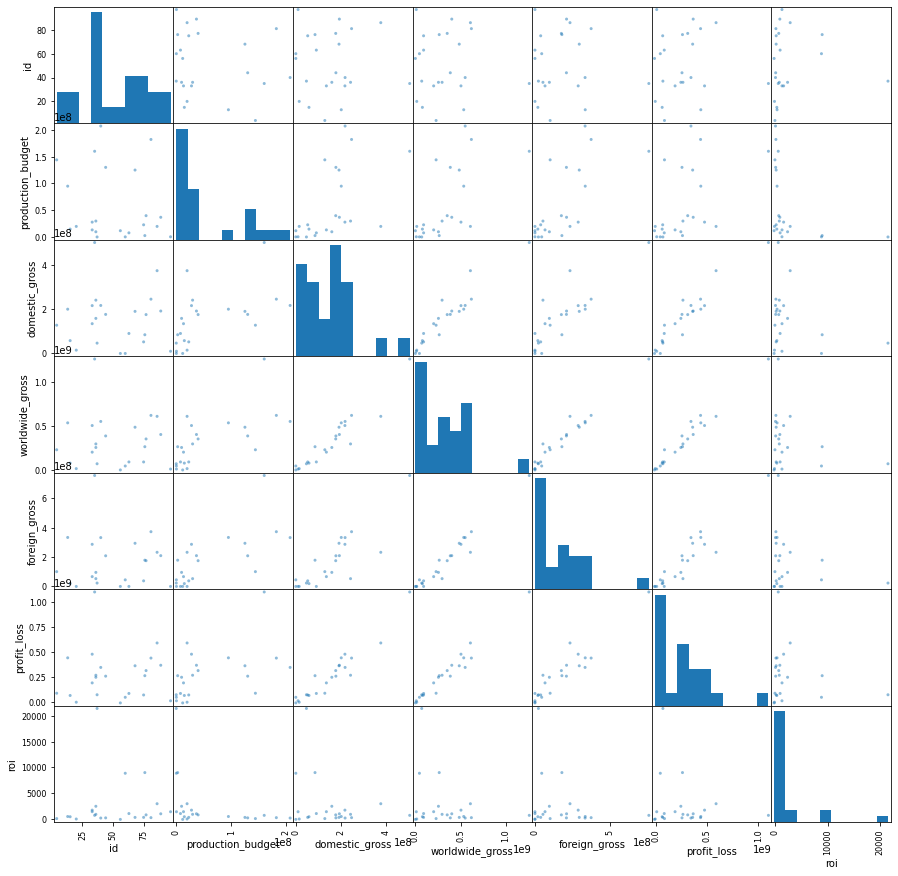

In [71]:
pd.plotting.scatter_matrix(samenamemovies, figsize=(15,15));

In [145]:
samenamemovies.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,23.000000,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,23.000000
mean,51.043478,5.669117e+07,1.532736e+08,3.193282e+08,1.660546e+08,2.626370e+08,2414.523861
std,26.740297,6.627972e+07,1.225910e+08,2.900734e+08,1.783646e+08,2.510174e+08,4818.652782
min,4.000000,3.250000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+07,-100.000000
25%,34.000000,1.100000e+07,5.544180e+07,8.406442e+07,3.050000e+07,6.864472e+07,264.121219
50%,44.000000,2.300000e+07,1.593420e+08,2.635914e+08,1.006581e+08,2.559979e+08,779.437345
75%,75.500000,1.100000e+08,2.092508e+08,4.945275e+08,2.595369e+08,3.626425e+08,1548.237825
max,97.000000,2.070000e+08,5.040142e+08,1.259200e+09,7.551855e+08,1.099200e+09,21438.461538


In [51]:
dfpnlroi.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,154.000000,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,154.000000
mean,52.097403,3.688295e+07,1.875111e+08,4.492830e+08,2.617720e+08,4.124001e+08,2589.942600
std,27.115046,3.843575e+07,1.156180e+08,2.981872e+08,2.110623e+08,2.722996e+08,4849.471520
min,2.000000,3.250000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+07,-100.000000
25%,27.000000,1.400000e+07,1.177050e+08,2.691111e+08,1.347221e+08,2.540567e+08,923.043907
50%,54.000000,2.300000e+07,1.694095e+08,3.516975e+08,2.024859e+08,3.201020e+08,1337.299958
75%,75.000000,4.150000e+07,2.420189e+08,5.441326e+08,2.984265e+08,4.860073e+08,2245.155600
max,100.000000,2.070000e+08,6.593639e+08,2.208208e+09,1.548844e+09,2.008208e+09,41283.333333


In [94]:
thenumbers.sort_values(by='profit_loss', ascending=False).head(500).describe() 
#minimum of top 500 pnl is 2.037891e+08 (Paddington)

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000
mean,52.402000,1.014892e+08,2.060151e+08,5.351701e+08,3.291550e+08,4.336809e+08,994.129800
std,27.609726,7.038439e+07,1.150503e+08,3.046938e+08,2.150873e+08,2.628729e+08,2705.466313
min,1.000000,6.000000e+05,3.276600e+04,2.129288e+08,4.974632e+07,2.037891e+08,110.232772
25%,29.000000,4.475000e+07,1.348572e+08,3.318335e+08,1.884257e+08,2.570552e+08,294.116333
50%,52.000000,9.000000e+07,1.787136e+08,4.323984e+08,2.671379e+08,3.413863e+08,432.354309
75%,75.250000,1.500000e+08,2.460727e+08,6.521509e+08,4.197305e+08,5.247946e+08,826.323140
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,2.351345e+09,41283.333333


In [99]:
thenumbers.sort_values(by='roi', ascending=False).head(500)
#minimum of top 500 roi is 759.705987 (The Woman in Black)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
5745,46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,0.0,44975000.0,179900.000000
5613,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,91000000.0,99550000.0,49775.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,86264224.0,193733034.0,43051.785333
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,18892064.0,41556474.0,41556.474000
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,107760901.0,247700000.0,41283.333333
...,...,...,...,...,...,...,...,...,...
4085,86,"Jul 12, 1991",Boyz n the Hood,6500000.0,56190094.0,56215095.0,25001.0,49715095.0,764.847615
2406,7,"Nov 11, 1994",The Santa Clause,22000000.0,144833357.0,189800000.0,44966643.0,167800000.0,762.727273
842,43,"Dec 22, 2004",Meet the Fockers,60000000.0,279167575.0,516567575.0,237400000.0,456567575.0,760.945958
3890,91,"Jun 27, 2014",Begin Again,8000000.0,16170632.0,68838736.0,52668104.0,60838736.0,760.484200


In [147]:
samenamemovies2 = samenamemovies[samenamemovies["profit_loss"] > 203789100]
samenamemovies2.sort_values(by = "profit_loss", ascending = False)
#samenamemovies5 = samenamemovies2[samenamemovies2["roi"] > 759.705987]
#samenamemovies5

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,755185541.0,1.099200e+09,686.999816
2485,86,"Nov 13, 1991",Beauty and the Beast,20000000.0,376057266.0,6.084311e+08,232373866.0,5.884311e+08,2942.155660
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,5.040502e+08,286700000.0,4.760502e+08,1700.179354
412,13,"Mar 13, 2015",Cinderella,95000000.0,201151353.0,5.345514e+08,333400000.0,4.395514e+08,462.685635
80,81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,4.372343e+08,240.238634
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,4.022802e+08,209510305.0,3.652802e+08,987.243673
267,68,"Aug 8, 2014",Teenage Mutant Ninja Turtles,125000000.0,191204754.0,4.850048e+08,293800000.0,3.600048e+08,288.003803
39,40,"Dec 14, 2005",King Kong,207000000.0,218080025.0,5.505174e+08,332437332.0,3.435174e+08,165.950414
1376,77,"Jun 11, 2010",The Karate Kid,40000000.0,176591618.0,3.517749e+08,175183320.0,3.117749e+08,779.437345
1835,36,"Jun 8, 1984",Ghostbusters,30000000.0,242212467.0,2.952125e+08,53000000.0,2.652125e+08,884.041557


In [148]:
samenamemovies3 = samenamemovies[samenamemovies["roi"] > 759.705987]
samenamemovies3.sort_values(by = "roi", ascending = False)
#samenamemovies4 = samenamemovies3[samenamemovies3["profit_loss"] > 203789100]
#samenamemovies4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
5536,37,"Oct 17, 1978",Halloween,325000.0,47000000.0,70000000.0,23000000.0,69675000.0,21438.461538
4775,76,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,263591415.0,178591415.0,260691415.0,8989.359138
5459,60,"Apr 23, 2009",Home,500000.0,15433.0,44793168.0,44777735.0,44293168.0,8858.633600
2485,86,"Nov 13, 1991",Beauty and the Beast,20000000.0,376057266.0,608431132.0,232373866.0,588431132.0,2942.155660
3535,36,"Oct 19, 2018",Halloween,10000000.0,159342015.0,254900667.0,95558652.0,244900667.0,2449.006670
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,504050219.0,286700000.0,476050219.0,1700.179354
3232,33,"Mar 30, 1990",Teenage Mutant Ninja Turtles,13500000.0,135265915.0,202000000.0,66734085.0,188500000.0,1396.296296
5396,97,"Apr 7, 1933",King Kong,672000.0,10000000.0,10000650.0,650.0,9328650.0,1388.191964
3862,63,"Jun 22, 1984",The Karate Kid,8000000.0,90815558.0,90815558.0,0.0,82815558.0,1035.194475
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,402280159.0,209510305.0,365280159.0,987.243673


In [150]:
worthymovies = pd.concat([samenamemovies2, samenamemovies3]).drop_duplicates()
worthymovies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
39,40,"Dec 14, 2005",King Kong,207000000.0,218080025.0,5.505174e+08,332437332.0,3.435174e+08,165.950414
80,81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,4.372343e+08,240.238634
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,755185541.0,1.099200e+09,686.999816
243,44,"Mar 27, 2015",Home,130000000.0,177397510.0,3.859979e+08,208600386.0,2.559979e+08,196.921458
267,68,"Aug 8, 2014",Teenage Mutant Ninja Turtles,125000000.0,191204754.0,4.850048e+08,293800000.0,3.600048e+08,288.003803
412,13,"Mar 13, 2015",Cinderella,95000000.0,201151353.0,5.345514e+08,333400000.0,4.395514e+08,462.685635
1376,77,"Jun 11, 2010",The Karate Kid,40000000.0,176591618.0,3.517749e+08,175183320.0,3.117749e+08,779.437345
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,4.022802e+08,209510305.0,3.652802e+08,987.243673
1835,36,"Jun 8, 1984",Ghostbusters,30000000.0,242212467.0,2.952125e+08,53000000.0,2.652125e+08,884.041557
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,5.040502e+08,286700000.0,4.760502e+08,1700.179354


In [157]:
unworthymovies = samenamemovies[~samenamemovies.isin(worthymovies)].dropna()
unworthymovies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
203,4.0,"Jul 15, 2016",Ghostbusters,144000000.0,128350574.0,229008658.0,100658084.0,85008658.0,59.033790
2374,75.0,"Dec 17, 1976",King Kong,23000000.0,52614445.0,90614445.0,38000000.0,67614445.0,293.975848
2619,20.0,"Mar 6, 1998",Twilight,20000000.0,15055091.0,15055091.0,0.0,-4944909.0,-24.724545
3014,15.0,"Aug 31, 2007",Halloween,15000000.0,58269151.0,77514401.0,19245250.0,62514401.0,416.762673
3455,56.0,"Jun 5, 2009",Home,12000000.0,0.0,0.0,0.0,-12000000.0,-100.000000


In [143]:
dfpnlroi

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
39,40,"Dec 14, 2005",King Kong,207000000.0,218080025.0,5.505174e+08,3.324373e+08,3.435174e+08,165.950414
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09,1004.104198
80,81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,3.725000e+08,4.372343e+08,240.238634
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,7.551855e+08,1.099200e+09,686.999816
203,4,"Jul 15, 2016",Ghostbusters,144000000.0,128350574.0,2.290087e+08,1.006581e+08,8.500866e+07,59.033790
...,...,...,...,...,...,...,...,...,...
5346,47,"Aug 13, 1942",Bambi,858000.0,102797000.0,2.680000e+08,1.652030e+08,2.671420e+08,31135.431235
5396,97,"Apr 7, 1933",King Kong,672000.0,10000000.0,1.000065e+07,6.500000e+02,9.328650e+06,1388.191964
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,2.483000e+08,1.077609e+08,2.477000e+08,41283.333333
5459,60,"Apr 23, 2009",Home,500000.0,15433.0,4.479317e+07,4.477774e+07,4.429317e+07,8858.633600


In [161]:
dfpnlroi2 = dfpnlroi[~dfpnlroi.isin(unworthymovies)].dropna()

In [166]:
dfpnlroi2.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,149.000000,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,149.000000
mean,52.704698,3.668440e+07,1.920967e+08,4.615933e+08,2.694965e+08,4.249089e+08,2672.524246
std,26.910137,3.793417e+07,1.144551e+08,2.949545e+08,2.101310e+08,2.678546e+08,4909.085714
min,2.000000,3.250000e+05,1.543300e+04,1.000065e+07,0.000000e+00,9.328650e+06,165.950414
25%,28.000000,1.400000e+07,1.212481e+08,2.749499e+08,1.414032e+08,2.565000e+08,973.354526
50%,55.000000,2.400000e+07,1.728254e+08,3.567996e+08,2.086004e+08,3.336201e+08,1358.947368
75%,75.000000,4.200000e+07,2.467343e+08,5.505174e+08,3.256000e+08,4.937967e+08,2275.053647
max,100.000000,2.070000e+08,6.593639e+08,2.208208e+09,1.548844e+09,2.008208e+09,41283.333333


In [167]:
thenumbers.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,5.989970e+07,380.016137
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,1.460889e+08,2953.028231
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-2.002376e+08,-100.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-2.189071e+06,-50.770440
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,8.550286e+06,70.830983
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,6.096850e+07,275.834608
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,2.351345e+09,179900.000000


In [196]:
dfpnlroi2['release_date'] = pd.to_datetime(dfpnlroi2['release_date'])
dfpnlroi2.sort_values(by="release_date", ascending=False).head(60)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,year
80,81.0,2019-05-24,Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,4.372343e+08,240.238634,"May 24, 2019"
2487,88.0,2019-03-22,Us,20000000.0,175006930.0,2.542103e+08,79203380.0,2.342103e+08,1171.051550,NaN
2499,100.0,2019-01-18,Glass,20000000.0,111035005.0,2.453035e+08,134268500.0,2.253035e+08,1126.517525,NaN
2370,71.0,2018-11-16,Green Book,23000000.0,85080171.0,3.220344e+08,236954268.0,2.990344e+08,1300.149735,NaN
983,84.0,2018-11-02,Bohemian Rhapsody,55000000.0,216303339.0,8.949853e+08,678682003.0,8.399853e+08,1527.246076,NaN
3535,36.0,2018-10-19,Halloween,10000000.0,159342015.0,2.549007e+08,95558652.0,2.449007e+08,2449.006670,NaN
1604,5.0,2018-10-05,A Star is Born,36000000.0,215288866.0,4.334496e+08,218160705.0,3.974496e+08,1104.026586,NaN
2865,66.0,2018-04-06,A Quiet Place,17000000.0,188024361.0,3.345223e+08,146497933.0,3.175223e+08,1867.778200,NaN
437,38.0,2017-12-20,Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.644962e+08,559987277.0,8.744962e+08,971.662437,NaN
2494,95.0,2017-11-17,Wonder,20000000.0,132422809.0,3.046047e+08,172181903.0,2.846047e+08,1423.023560,NaN


In [189]:
dfpnlroi2["release_date"].apply(type).value_counts()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>    149
Name: release_date, dtype: int64

In [251]:
dfpnlroi2["release_date"].min()

Timestamp('1933-04-07 00:00:00')

In [252]:
dfpnlroi2["release_date"].max()

Timestamp('2019-05-24 00:00:00')

In [554]:
dfpnlroi[dfpnlroi['movie'].str.contains('mission', regex=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi


In [193]:
pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [212]:
bomdf = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [560]:
newbomdf = pd.read_csv("zippedData/movie_gross_data.csv", index_col=0)

In [216]:
bomdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [218]:
bomdf.sort_values(by="year", ascending=False).head(60)

,title,studio,domestic_gross,foreign_gross,year
3386,An Actor Prepares,Grav.,1700.0,NaN,2018
3183,On the Basis of Sex,Focus,24600000.0,13600000,2018
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018
3177,Mary Queen of Scots,Focus,16500000.0,29900000,2018
3178,The Possession of Hannah Grace,SGem,14800000.0,28200000,2018
3179,Overlord,Par.,21700000.0,20000000,2018
3180,The Darkest Minds,Fox,12700000.0,28400000,2018
3181,Holmes and Watson,Sony,30600000.0,9900000,2018
3182,Show Dogs,Global Road,17900000.0,21300000,2018
3184,Namiya,CL,70800.0,35300000,2018


In [564]:
newbomdf[newbomdf['Release Group'].str.contains('Mission', regex=False)]

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1,year
68,69,My Hero Academia: World Heroes' Mission,"$46,951,862","$12,271,658",26.1%,"$34,680,204",73.9%,2021
193,194,The Secret Mission,"$21,083,522",-,-,"$21,083,522",100%,2019
7,8,Mission: Impossible - Fallout,"$791,115,104","$220,159,104",27.8%,"$570,956,000",72.2%,2018
194,195,Extraordinary Mission,"$22,757,764","$54,174",0.2%,"$22,703,590",99.8%,2017
147,148,Mission Milano,"$37,749,848",-,-,"$37,749,848",100%,2016
7,8,Mission: Impossible - Rogue Nation,"$682,714,267","$195,042,377",28.6%,"$487,671,890",71.4%,2015
4,5,Mission: Impossible - Ghost Protocol,"$694,713,380","$209,397,903",30.1%,"$485,315,477",69.9%,2011
7,8,Mission: Impossible III,"$398,479,497","$134,029,801",33.6%,"$264,449,696",66.4%,2006
197,198,Samurai Commando Mission 1549,"$14,648,713",-,-,"$14,648,713",100%,2005
46,47,Asterix & Obelix: Mission Cleopatra,"$108,012,365",-,-,"$108,012,365",100%,2002


In [217]:
newbomdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 0 to 34
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           8440 non-null   int64 
 1   Release Group  8440 non-null   object
 2   Worldwide      8440 non-null   object
 3   Domestic       8440 non-null   object
 4   %              8440 non-null   object
 5   Foreign        8440 non-null   object
 6   %.1            8440 non-null   object
 7   year           8440 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 593.4+ KB


In [219]:
newbomdf.sort_values(by="year", ascending=False).head(60)

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1,year
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022
138,139,Even if This Love Disappears from the World To...,"$3,979,991",-,-,"$3,979,991",100%,2022
128,129,Vysehrad: Fylm,"$4,462,369",-,-,"$4,462,369",100%,2022
129,130,Free! The Final Stroke Part 2,"$4,305,978",-,-,"$4,305,978",100%,2022
130,131,Permis de construire,"$4,298,296",-,-,"$4,298,296",100%,2022
131,132,Pawankhind,"$4,260,686",-,-,"$4,260,686",100%,2022
132,133,Fireheart,"$4,222,519","$49,848",1.2%,"$4,172,671",98.8%,2022
133,134,The Godfather 2022 Re-release,"$4,214,662","$1,414,662",33.6%,"$2,800,000",66.4%,2022
134,135,Em Va Trinh,"$4,164,201",-,-,"$4,164,201",100%,2022
135,136,National Theatre Live: Prima Facie,"$4,096,029",-,-,"$4,096,029",100%,2022


In [221]:
budgets = pd.read_csv("zippedData/movies budgets.csv")

In [265]:
justbudgets = budgets.drop(droplist,axis=1) #just extract budgets

In [266]:
justbudgets.drop(justbudgets[justbudgets['budget'] <= 1].index, inplace = True) #remove records with no budget info

In [270]:
justbudgets.drop_duplicates(inplace=True)

In [273]:
justbudgets["movie (year)"] = justbudgets['title'].astype(str) + " (" + justbudgets['release_date'].str[0:4] + ")"

In [274]:
justbudgets

,title,release_date,budget,movie (year)
1,Thor: Love and Thunder,2022-07-06,250000000.0,Thor: Love and Thunder (2022)
2,Jurassic World Dominion,2022-06-01,165000000.0,Jurassic World Dominion (2022)
3,Minions: The Rise of Gru,2022-06-29,85000000.0,Minions: The Rise of Gru (2022)
4,Top Gun: Maverick,2022-05-24,170000000.0,Top Gun: Maverick (2022)
5,The Black Phone,2022-06-22,18800000.0,The Black Phone (2022)
...,...,...,...,...
754889,A Choreography of Violence,2018-09-25,200.0,A Choreography of Violence (2018)
754902,Free To Ride: The Documentary,2017-02-15,200.0,Free To Ride: The Documentary (2017)
754984,Maslakh,2016-10-19,10000.0,Maslakh (2016)
755038,Limp-dick,2018-01-01,100.0,Limp-dick (2018)


In [268]:
justbudgetsdup = justbudgets[justbudgets.duplicated(keep=False)]

In [269]:
justbudgetsdup.head(50)

,title,release_date,budget
329,Wild Indian,2021-09-03,20000000.0
417,The Shack,2017-03-03,20000000.0
477,The Shack,2017-03-03,20000000.0
578,The Shack,2017-03-03,20000000.0
581,Wild Indian,2021-09-03,20000000.0
914,Benny Loves You,2019-11-21,10000.0
952,Odd Thomas,2013-01-29,27000000.0
1197,Deep Blue Sea 3,2020-08-25,5000000.0
1198,Sentinelle,2021-03-05,6500000.0
1255,Sentinelle,2021-03-05,6500000.0


In [ ]:
#pd.merge(df1,df2,on ='Name', how ='left')

In [228]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755117 entries, 0 to 755116
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    755117 non-null  int64  
 1   title                 755113 non-null  object 
 2   genres                530801 non-null  object 
 3   original_language     755117 non-null  object 
 4   overview              631608 non-null  object 
 5   popularity            755117 non-null  float64
 6   production_companies  350195 non-null  object 
 7   release_date          695670 non-null  object 
 8   budget                755117 non-null  float64
 9   revenue               755117 non-null  float64
 10  runtime               715324 non-null  float64
 11  status                755117 non-null  object 
 12  tagline               111394 non-null  object 
 13  vote_average          755117 non-null  float64
 14  vote_count            755117 non-null  float64
 15  

In [231]:
droplist = list(budgets.columns)

In [236]:
droplist.remove('title')

In [237]:
droplist.remove('budget')

In [264]:
droplist.remove('release_date')

In [253]:
newbomdf.rename({'Release Group': 'title'}, axis=1, inplace=True)

In [275]:
newbomdf.duplicated().values.sum()

0

In [276]:
newbomdf

,Rank,title,Worldwide,Domestic,%,Foreign,%.1,year
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022
...,...,...,...,...,...,...,...,...
30,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977
31,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977
32,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977
33,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977


In [278]:
newbomdf["movie (year)"] = newbomdf['title'].astype(str) + " (" + newbomdf['year'].astype(str).str[0:4] + ")"

In [539]:
newbomdf[newbomdf['movie (year)'].str.contains('mission', regex=False)]

,Rank,title,Worldwide,Domestic,%,Foreign,%.1,year,movie (year)
37,38,BTS Permission to Dance on Stage - Seoul: Live...,"$32,600,000","$6,840,000",21%,"$25,760,000",79%,2022,BTS Permission to Dance on Stage - Seoul: Live...


In [279]:
newbomdf

,Rank,title,Worldwide,Domestic,%,Foreign,%.1,year,movie (year)
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022,Top Gun: Maverick (2022)
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022,Jurassic World Dominion (2022)
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022,Doctor Strange in the Multiverse of Madness (2...
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022,The Batman (2022)
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022,Minions: The Rise of Gru (2022)
...,...,...,...,...,...,...,...,...,...
30,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977,"Race for Your Life, Charlie Brown (1977)"
31,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977,March or Die (1977)
32,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977,Joseph Andrews (1977)
33,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977,Citizens Band (1977)


In [280]:
mergenewbombudgets = pd.merge(newbomdf,justbudgets,on ='movie (year)', how ='left')

In [285]:
mergenewbombudgets

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,release_date,budget
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022,Top Gun: Maverick (2022),Top Gun: Maverick,2022-05-24,170000000.0
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022,Jurassic World Dominion (2022),Jurassic World Dominion,2022-06-01,165000000.0
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022,Doctor Strange in the Multiverse of Madness (2...,Doctor Strange in the Multiverse of Madness,2022-05-04,200000001.0
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022,The Batman (2022),The Batman,2022-03-01,185000000.0
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022,Minions: The Rise of Gru (2022),Minions: The Rise of Gru,2022-06-29,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8441,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977,"Race for Your Life, Charlie Brown (1977)",NaN,NaN,NaN
8442,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977,March or Die (1977),NaN,NaN,NaN
8443,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977,Joseph Andrews (1977),NaN,NaN,NaN
8444,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977,Citizens Band (1977),NaN,NaN,NaN


In [286]:
mergenewbombudgets.dropna(inplace=True)

In [294]:
mergenewbombudgets

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,release_date,budget
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022,Top Gun: Maverick (2022),Top Gun: Maverick,2022-05-24,170000000.0
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022,Jurassic World Dominion (2022),Jurassic World Dominion,2022-06-01,165000000.0
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022,Doctor Strange in the Multiverse of Madness (2...,Doctor Strange in the Multiverse of Madness,2022-05-04,200000001.0
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022,The Batman (2022),The Batman,2022-03-01,185000000.0
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022,Minions: The Rise of Gru (2022),Minions: The Rise of Gru,2022-06-29,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8424,14,Exorcist II: The Heretic,"$30,749,142","$30,749,142",100%,-,-,1977,Exorcist II: The Heretic (1977),Exorcist II: The Heretic,1977-06-17,14000000.0
8425,15,The Rescuers,"$29,000,000","$29,000,000",100%,-,-,1977,The Rescuers (1977),The Rescuers,1977-06-22,1200000.0
8428,18,The Gauntlet,"$26,414,658","$26,414,658",100%,-,-,1977,The Gauntlet (1977),The Gauntlet,1977-12-21,5500000.0
8436,26,"New York, New York","$16,400,000","$16,400,000",100%,-,-,1977,"New York, New York (1977)","New York, New York",1977-06-21,14000000.0


In [289]:
thenumbers #first time i did this, didn't create movie+year so had to do extra cool programming to deal with movies that share same name
#this time, tho, I will deal with this ahead of time

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,315.369636
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,-7.000000e+03,-100.000000
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,1.920130e+05,2.344950e+05,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.000000e+00,-3.662000e+03,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,-1.400000e+03,-100.000000


In [575]:
thenumbers["movie (year)"] = thenumbers['movie'].astype(str) + " (" + thenumbers['release_date'].astype(str).str[-4:] + ")"

In [576]:
thenumbers.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,movie (year)
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,553.257713,Avatar (2009)
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,154.667286,Pirates of the Caribbean: On Stranger Tides (2...
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,-57.210757,Dark Phoenix (2019)
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,324.384139,Avengers: Age of Ultron (2015)
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,315.369636,Star Wars Ep. VIII: The Last Jedi (2017)
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,1.747311e+09,571.016739,Star Wars Ep. VII: The Force Awakens (2015)
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,1.748134e+09,582.711400,Avengers: Infinity War (2018)
7,8,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,6.540000e+08,6.634204e+08,221.140142,Pirates of the Caribbean: At World's End (2007)
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,4.269209e+08,3.559452e+08,118.648403,Justice League (2017)
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,6.795467e+08,5.796209e+08,193.206974,Spectre (2015)


In [574]:
thenumbers[thenumbers['movie (year)'].str.contains('Pirates', regex=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,movie (year)
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,804600000.0,635063875.0,154.667286,Pirates of the Caribbean: On Stranger Tides (2...
7,8,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,654000000.0,663420425.0,221.140142,Pirates of the Caribbean: At Worldâs End (2007)
24,25,"May 26, 2017",Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,172558876.0,7.882411e+08,615682261.0,558241137.0,242.713538,Pirates of the Caribbean: Dead Men Tell No Tal...
27,28,"Jul 7, 2006",Pirates of the Caribbean: Dead Man's Chest,225000000.0,423315812.0,1.066216e+09,642900000.0,841215812.0,373.873694,Pirates of the Caribbean: Dead Manâs Chest (...
205,6,"Jul 9, 2003",Pirates of the Caribbean: The Curse of the Bla...,140000000.0,305411224.0,6.349541e+08,329542879.0,494954103.0,353.538645,Pirates of the Caribbean: The Curse of the Bla...
1033,34,"Apr 27, 2012",The Pirates! Band of Misfits,55000000.0,31051126.0,1.361436e+08,105092479.0,81143605.0,147.533827,The Pirates! Band of Misfits (2012)
1530,31,"Jul 1, 1986",Pirates,40000000.0,1641825.0,6.341825e+06,4700000.0,-33658175.0,-84.145437,Pirates (1986)
3086,87,"Jan 11, 2008",The Pirates Who Don't Do Anything: A VeggieTal...,15000000.0,12981269.0,1.324844e+07,267175.0,-1751556.0,-11.677040,The Pirates Who Don't Do Anything: A VeggieTal...
3787,88,"Mar 16, 1984",The Ice Pirates,9000000.0,13075390.0,1.307539e+07,0.0,4075390.0,45.282111,The Ice Pirates (1984)


In [573]:
thenumbers['movie'] = thenumbers['movie'].str.replace("â","'")

In [567]:
mergenewbombudgets[mergenewbombudgets['movie (year)'].str.contains('Mission', regex=False)]

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,release_date,budget
807,8,Mission: Impossible - Fallout,"$791,115,104","$220,159,104",27.8%,"$570,956,000",72.2%,2018,Mission: Impossible - Fallout (2018),Mission: Impossible - Fallout,2018-07-13,178000000.0
1196,195,Extraordinary Mission,"$22,757,764","$54,174",0.2%,"$22,703,590",99.8%,2017,Extraordinary Mission (2017),Extraordinary Mission,2017-03-31,250000.0
1410,8,Mission: Impossible - Rogue Nation,"$682,714,267","$195,042,377",28.6%,"$487,671,890",71.4%,2015,Mission: Impossible - Rogue Nation (2015),Mission: Impossible - Rogue Nation,2015-07-23,150000000.0
2207,5,Mission: Impossible - Ghost Protocol,"$694,713,380","$209,397,903",30.1%,"$485,315,477",69.9%,2011,Mission: Impossible - Ghost Protocol (2011),Mission: Impossible - Ghost Protocol,2011-12-07,145000000.0
3210,8,Mission: Impossible III,"$398,479,497","$134,029,801",33.6%,"$264,449,696",66.4%,2006,Mission: Impossible III (2006),Mission: Impossible III,2006-05-03,150000000.0
4050,47,Asterix & Obelix: Mission Cleopatra,"$108,012,365",-,-,"$108,012,365",100%,2002,Asterix & Obelix: Mission Cleopatra (2002),Asterix & Obelix: Mission Cleopatra,2002-01-30,58500000.0
4404,1,Mission: Impossible II,"$546,388,108","$215,409,889",39.4%,"$330,978,219",60.6%,2000,Mission: Impossible II (2000),Mission: Impossible II,2000-05-24,125000000.0
4443,40,Mission to Mars,"$110,983,407","$60,883,407",54.9%,"$50,100,000",45.1%,2000,Mission to Mars (2000),Mission to Mars,2000-03-10,90000000.0
5209,4,Mission: Impossible,"$180,981,856","$180,981,856",100%,-,-,1996,Mission: Impossible (1996),Mission: Impossible,1996-05-22,80000000.0
7257,52,The Mission,"$17,218,023","$17,218,023",100%,-,-,1986,The Mission (1986),The Mission,1986-09-29,24500000.0


In [577]:
testing = pd.merge(mergenewbombudgets,thenumbers,on ='movie (year)', how ='outer')

In [578]:
testing[["movie (year)","budget","production_budget"]]

,movie (year),budget,production_budget
0,Top Gun: Maverick (2022),170000000.0,NaN
1,Jurassic World Dominion (2022),165000000.0,NaN
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,NaN
3,The Batman (2022),185000000.0,NaN
4,Minions: The Rise of Gru (2022),85000000.0,NaN
...,...,...,...
7625,Red 11 (2018),NaN,7000.0
7626,Following (1999),NaN,6000.0
7627,Return to the Land of Wonders (2005),NaN,5000.0
7628,A Plague So Pleasant (2015),NaN,1400.0


In [579]:
testing[["movie (year)","budget","production_budget"]]

,movie (year),budget,production_budget
0,Top Gun: Maverick (2022),170000000.0,NaN
1,Jurassic World Dominion (2022),165000000.0,NaN
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,NaN
3,The Batman (2022),185000000.0,NaN
4,Minions: The Rise of Gru (2022),85000000.0,NaN
...,...,...,...
7625,Red 11 (2018),NaN,7000.0
7626,Following (1999),NaN,6000.0
7627,Return to the Land of Wonders (2005),NaN,5000.0
7628,A Plague So Pleasant (2015),NaN,1400.0


In [580]:
testing['maxBudget'] = testing.apply(
    lambda row: max(row["budget"] , row["production_budget"]), axis=1)

In [581]:
testing['maxBudget'] = testing['maxBudget'].fillna(testing['production_budget'])

In [582]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 0 to 7629
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               4794 non-null   float64
 1   title_x            4794 non-null   object 
 2   Worldwide          4794 non-null   object 
 3   Domestic           4794 non-null   object 
 4   %                  4794 non-null   object 
 5   Foreign            4794 non-null   object 
 6   %.1                4794 non-null   object 
 7   year               4794 non-null   float64
 8   movie (year)       7630 non-null   object 
 9   title_y            4794 non-null   object 
 10  release_date_x     4794 non-null   object 
 11  budget             4794 non-null   float64
 12  id                 5787 non-null   float64
 13  release_date_y     5787 non-null   object 
 14  movie              5787 non-null   object 
 15  production_budget  5787 non-null   float64
 16  domestic_gross     5787 

In [399]:
testing[["movie (year)","budget","production_budget", 'maxBudget']].head(2000)

,movie (year),budget,production_budget,maxBudget
0,Top Gun: Maverick (2022),170000000.0,NaN,170000000.0
1,Jurassic World Dominion (2022),165000000.0,NaN,165000000.0
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,NaN,200000001.0
3,The Batman (2022),185000000.0,NaN,185000000.0
4,Minions: The Rise of Gru (2022),85000000.0,NaN,85000000.0
...,...,...,...,...
1995,The Host (2006),11000000.0,NaN,11000000.0
1996,The Illusionist (2006),16500000.0,16500000.0,16500000.0
1997,RV (2006),50000000.0,NaN,50000000.0
1998,The Shaggy Dog (2006),50000000.0,60000000.0,60000000.0


In [402]:
testing.head(4000)

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,...,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget
0,1.0,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022.0,Top Gun: Maverick (2022),Top Gun: Maverick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170000000.0
1,2.0,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022.0,Jurassic World Dominion (2022),Jurassic World Dominion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165000000.0
2,3.0,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022.0,Doctor Strange in the Multiverse of Madness (2...,Doctor Strange in the Multiverse of Madness,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000001.0
3,4.0,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022.0,The Batman (2022),The Batman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185000000.0
4,5.0,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022.0,Minions: The Rise of Gru (2022),Minions: The Rise of Gru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,54.0,The Russia House,"$22,997,992","$22,997,992",100%,-,-,1990.0,The Russia House (1990),The Russia House,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21800000.0
3996,55.0,The First Power,"$22,424,195","$22,424,195",100%,-,-,1990.0,The First Power (1990),The First Power,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0
3997,56.0,The Rookie,"$21,633,874","$21,633,874",100%,-,-,1990.0,The Rookie (1990),The Rookie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0
3998,58.0,The Adventures of Ford Fairlane,"$21,413,502","$21,413,502",100%,-,-,1990.0,The Adventures of Ford Fairlane (1990),The Adventures of Ford Fairlane,...,12.0,"Jul 11, 1990",The Adventures of Ford Fairlane,49000000.0,20423389.0,20423389.0,0.0,-28576611.0,-58.319614,49000000.0


In [583]:
testing[testing['movie (year)'].str.contains('Mission', regex=False)]

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,...,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget
306,8.0,Mission: Impossible - Fallout,"$791,115,104","$220,159,104",27.8%,"$570,956,000",72.2%,2018.0,Mission: Impossible - Fallout (2018),Mission: Impossible - Fallout,...,92.0,"Jul 27, 2018",Mission: Impossible - Fallout,178000000.0,220159104.0,787456552.0,567297448.0,609456552.0,342.391321,178000000.0
566,195.0,Extraordinary Mission,"$22,757,764","$54,174",0.2%,"$22,703,590",99.8%,2017.0,Extraordinary Mission (2017),Extraordinary Mission,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0
719,8.0,Mission: Impossible - Rogue Nation,"$682,714,267","$195,042,377",28.6%,"$487,671,890",71.4%,2015.0,Mission: Impossible - Rogue Nation (2015),Mission: Impossible - Rogue Nation,...,68.0,"Jul 31, 2015",Mission: Impossible - Rogue Nation,150000000.0,195042377.0,688858992.0,493816615.0,538858992.0,359.239328,150000000.0
1242,5.0,Mission: Impossible - Ghost Protocol,"$694,713,380","$209,397,903",30.1%,"$485,315,477",69.9%,2011.0,Mission: Impossible - Ghost Protocol (2011),Mission: Impossible - Ghost Protocol,...,98.0,"Dec 16, 2011",Mission: Impossible - Ghost Protocol,145000000.0,209397903.0,694713230.0,485315327.0,549713230.0,379.112572,145000000.0
1941,8.0,Mission: Impossible III,"$398,479,497","$134,029,801",33.6%,"$264,449,696",66.4%,2006.0,Mission: Impossible III (2006),Mission: Impossible III,...,80.0,"May 5, 2006",Mission: Impossible III,150000000.0,133501348.0,397501348.0,264000000.0,247501348.0,165.000899,150000000.0
2546,47.0,Asterix & Obelix: Mission Cleopatra,"$108,012,365",-,-,"$108,012,365",100%,2002.0,Asterix & Obelix: Mission Cleopatra (2002),Asterix & Obelix: Mission Cleopatra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58500000.0
2791,1.0,Mission: Impossible II,"$546,388,108","$215,409,889",39.4%,"$330,978,219",60.6%,2000.0,Mission: Impossible II (2000),Mission: Impossible II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125000000.0
2827,40.0,Mission to Mars,"$110,983,407","$60,883,407",54.9%,"$50,100,000",45.1%,2000.0,Mission to Mars (2000),Mission to Mars,...,69.0,"Mar 10, 2000",Mission to Mars,90000000.0,60874615.0,106000000.0,45125385.0,16000000.0,17.777778,90000000.0
3325,4.0,Mission: Impossible,"$180,981,856","$180,981,856",100%,-,-,1996.0,Mission: Impossible (1996),Mission: Impossible,...,40.0,"May 21, 1996",Mission: Impossible,80000000.0,180981886.0,457697994.0,276716108.0,377697994.0,472.122492,80000000.0
4328,52.0,The Mission,"$17,218,023","$17,218,023",100%,-,-,1986.0,The Mission (1986),The Mission,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24500000.0


In [584]:
test = testing.drop(["Rank","%","%.1"], axis=1)

In [585]:
test[~test.isnull().any(axis=1)]

,title_x,Worldwide,Domestic,Foreign,year,movie (year),title_y,release_date_x,budget,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget
191,Captain Marvel,"$1,128,274,794","$426,829,839","$701,444,955",2019.0,Captain Marvel (2019),Captain Marvel,2019-03-06,152000000.0,96.0,"Mar 8, 2019",Captain Marvel,175000000.0,426525952.0,1.123062e+09,696535598.0,948061550.0,541.749457,175000000.0
194,Aladdin,"$1,050,693,953","$355,559,216","$695,134,737",2019.0,Aladdin (2019),Aladdin,2019-05-22,183000000.0,81.0,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,437234314.0,240.238634,183000000.0
199,How to Train Your Dragon: The Hidden World,"$521,799,505","$160,799,505","$361,000,000",2019.0,How to Train Your Dragon: The Hidden World (2019),How to Train Your Dragon: The Hidden World,2019-01-03,129000000.0,56.0,"Feb 22, 2019",How to Train Your Dragon: The Hidden World,129000000.0,160791800.0,5.192583e+08,358466483.0,390258283.0,302.525801,129000000.0
202,The Secret Life of Pets 2,"$430,051,293","$158,874,395","$271,176,898",2019.0,The Secret Life of Pets 2 (2019),The Secret Life of Pets 2,2019-05-24,80000000.0,81.0,"Jun 7, 2019",The Secret Life of Pets 2,80000000.0,63795655.0,1.133515e+08,49555841.0,33351496.0,41.689370,80000000.0
203,Alita: Battle Angel,"$404,980,543","$85,838,210","$319,142,333",2019.0,Alita: Battle Angel (2019),Alita: Battle Angel,2019-01-31,170000000.0,24.0,"Feb 14, 2019",Alita: Battle Angel,170000000.0,85710210.0,4.029760e+08,317265826.0,232976036.0,137.044727,170000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,Annie Hall,"$38,251,425","$38,251,425",-,1977.0,Annie Hall (1977),Annie Hall,1977-04-19,4000000.0,80.0,"Apr 20, 1977",Annie Hall,4000000.0,38251425.0,3.825142e+07,0.0,34251425.0,856.285625,4000000.0
4786,Pete's Dragon,"$35,488,000","$35,488,000",-,1977.0,Pete's Dragon (1977),Pete's Dragon,1977-11-03,10000000.0,67.0,"Nov 3, 1977",Pete's Dragon,10000000.0,36000000.0,3.600000e+07,0.0,26000000.0,260.000000,10000000.0
4788,High Anxiety,"$31,063,038","$31,063,038",-,1977.0,High Anxiety (1977),High Anxiety,1977-12-25,4015000.0,36.0,"Dec 23, 1977",High Anxiety,3400000.0,31063038.0,3.106304e+07,0.0,27663038.0,813.618765,4015000.0
4789,Exorcist II: The Heretic,"$30,749,142","$30,749,142",-,1977.0,Exorcist II: The Heretic (1977),Exorcist II: The Heretic,1977-06-17,14000000.0,94.0,"Jun 17, 1977",Exorcist II: The Heretic,14000000.0,25011000.0,2.501100e+07,0.0,11011000.0,78.650000,14000000.0


In [586]:
test[['Worldwide','worldwide_gross','movie (year)']]

,Worldwide,worldwide_gross,movie (year)
0,"$1,354,758,251",NaN,Top Gun: Maverick (2022)
1,"$960,654,170",NaN,Jurassic World Dominion (2022)
2,"$954,860,995",NaN,Doctor Strange in the Multiverse of Madness (2...
3,"$770,836,163",NaN,The Batman (2022)
4,"$761,636,228",NaN,Minions: The Rise of Gru (2022)
...,...,...,...
7625,NaN,0.0,Red 11 (2018)
7626,NaN,240495.0,Following (1999)
7627,NaN,1338.0,Return to the Land of Wonders (2005)
7628,NaN,0.0,A Plague So Pleasant (2015)


In [587]:
test["Worldwide"] = test["Worldwide"].replace({'\$': '', ',': ''}, regex=True).astype(float)
test["Worldwide"].apply(type).value_counts()

<class 'float'>    7630
Name: Worldwide, dtype: int64

In [588]:
test["Domestic"] = test["Domestic"].replace({'\$': '', ',': '', '-': '0'}, regex=True).astype(float)
test["Domestic"].apply(type).value_counts()

<class 'float'>    7630
Name: Domestic, dtype: int64

In [589]:
test["Foreign"] = test["Foreign"].replace({'\$': '', ',': '', '-': '0'}, regex=True).astype(float)
test["Foreign"].apply(type).value_counts()

<class 'float'>    7630
Name: Foreign, dtype: int64

In [590]:
test['WW UTD'] = test.apply(
    lambda row: max(row["Worldwide"] , row["worldwide_gross"]), axis=1)
test['WW UTD'] = test['WW UTD'].fillna(testing['worldwide_gross'])

In [591]:
test[['Worldwide','worldwide_gross','WW UTD','movie (year)']].head(4800)

,Worldwide,worldwide_gross,WW UTD,movie (year)
0,1.354758e+09,NaN,1.354758e+09,Top Gun: Maverick (2022)
1,9.606542e+08,NaN,9.606542e+08,Jurassic World Dominion (2022)
2,9.548610e+08,NaN,9.548610e+08,Doctor Strange in the Multiverse of Madness (2...
3,7.708362e+08,NaN,7.708362e+08,The Batman (2022)
4,7.616362e+08,NaN,7.616362e+08,Minions: The Rise of Gru (2022)
...,...,...,...,...
4795,NaN,1.316722e+09,1.316722e+09,Star Wars Ep. VIII: The Last Jedi (2017)
4796,NaN,2.053311e+09,2.053311e+09,Star Wars Ep. VII: The Force Awakens (2015)
4797,NaN,4.592609e+08,4.592609e+08,X-Men: The Last Stand (2006)
4798,NaN,8.623162e+08,8.623162e+08,Guardians of the Galaxy Vol 2 (2017)


In [592]:
test['DOM UTD'] = test.apply(
    lambda row: max(row["Domestic"] , row["domestic_gross"]), axis=1)
test['DOM UTD'] = test['DOM UTD'].fillna(testing['domestic_gross'])

In [593]:
test['FOR UTD'] = test.apply(
    lambda row: max(row["Foreign"] , row["foreign_gross"]), axis=1)
test['FOR UTD'] = test['FOR UTD'].fillna(testing['foreign_gross'])

In [594]:
test["profit_loss"] = test["WW UTD"] - test["maxBudget"]

In [595]:
test["roi"] = (test["profit_loss"] / test["maxBudget"] ) *100

In [596]:
test["Year"] = test['movie (year)'].str[-5:-1].astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 0 to 7629
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            4794 non-null   object 
 1   Worldwide          4794 non-null   float64
 2   Domestic           4794 non-null   float64
 3   Foreign            4794 non-null   float64
 4   year               4794 non-null   float64
 5   movie (year)       7630 non-null   object 
 6   title_y            4794 non-null   object 
 7   release_date_x     4794 non-null   object 
 8   budget             4794 non-null   float64
 9   id                 5787 non-null   float64
 10  release_date_y     5787 non-null   object 
 11  movie              5787 non-null   object 
 12  production_budget  5787 non-null   float64
 13  domestic_gross     5787 non-null   float64
 14  worldwide_gross    5787 non-null   float64
 15  foreign_gross      5787 non-null   float64
 16  profit_loss        7630 

In [597]:
test.drop("year2", axis=1, inplace=True)

KeyError: "['year2'] not found in axis"

In [598]:
test.sort_values(by='maxBudget').head(500)

,title_x,Worldwide,Domestic,Foreign,year,movie (year),title_y,release_date_x,budget,id,...,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
4416,Kiss of the Spider Woman,17005229.0,17005229.0,0.0,1985.0,Kiss of the Spider Woman (1985),Kiss of the Spider Woman,1985-07-26,11.0,NaN,...,NaN,NaN,NaN,17005218.0,1.545929e+08,11.0,17005229.0,17005229.0,0.0,1985
1226,Bol Bachchan,28775262.0,1216258.0,27559004.0,2012.0,Bol Bachchan (2012),Bol Bachchan,2012-07-06,12.0,NaN,...,NaN,NaN,NaN,28775250.0,2.397938e+08,12.0,28775262.0,1216258.0,27559004.0,2012
3596,City Slickers II: The Legend of Curly's Gold,43622150.0,43622150.0,0.0,1994.0,City Slickers II: The Legend of Curly's Gold (...,City Slickers II: The Legend of Curly's Gold,1994-06-10,40.0,NaN,...,NaN,NaN,NaN,43622110.0,1.090553e+08,40.0,43622150.0,43622150.0,0.0,1994
363,Shadow,91708374.0,521396.0,91186978.0,2018.0,Shadow (2018),Shadow,2018-04-04,50.0,NaN,...,NaN,NaN,NaN,91708324.0,1.834166e+08,50.0,91708374.0,521396.0,91186978.0,2018
3946,Kickboxer 2: The Road Back,1250712.0,1250712.0,0.0,1991.0,Kickboxer 2: The Road Back (1991),Kickboxer 2: The Road Back,1991-01-30,89.0,NaN,...,NaN,NaN,NaN,1250623.0,1.405194e+06,89.0,1250712.0,1250712.0,0.0,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,NaN,NaN,NaN,NaN,NaN,On the Waterfront (1954),NaN,NaN,NaN,37.0,...,9600000.0,9600000.0,0.0,8690000.0,9.549451e+02,910000.0,9600000.0,9600000.0,0.0,1954
7204,NaN,NaN,NaN,NaN,NaN,Food Chains (2014),NaN,NaN,NaN,36.0,...,0.0,176.0,176.0,-912824.0,-9.998072e+01,913000.0,176.0,0.0,176.0,2014
7203,NaN,NaN,NaN,NaN,NaN,Lowriders (2017),NaN,NaN,NaN,35.0,...,6179955.0,6188421.0,8466.0,5272421.0,5.755918e+02,916000.0,6188421.0,6179955.0,8466.0,2017
7202,NaN,NaN,NaN,NaN,NaN,L!fe Happens (2012),NaN,NaN,NaN,34.0,...,30905.0,30905.0,0.0,-899095.0,-9.667688e+01,930000.0,30905.0,30905.0,0.0,2012


In [599]:
test.drop(test[test['maxBudget'] < 1000000].index, inplace = True) 
#dropping all records with budget data less than $1mil as its causing skews

In [600]:
test2 = test[test.columns[~test.isnull().any()]]

In [601]:
test3 = test2.sort_values(by="Year", ascending = False).head(5000) 
#take 5000 most recent movies in database, cuz we want currently which equates to 1999

In [603]:
test[test['movie (year)'].str.contains('Mission', regex=False)]

,title_x,Worldwide,Domestic,Foreign,year,movie (year),title_y,release_date_x,budget,id,...,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
306,Mission: Impossible - Fallout,791115104.0,220159104.0,570956000.0,2018.0,Mission: Impossible - Fallout (2018),Mission: Impossible - Fallout,2018-07-13,178000000.0,92.0,...,220159104.0,787456552.0,567297448.0,613115104.0,344.446688,178000000.0,791115104.0,220159104.0,570956000.0,2018
719,Mission: Impossible - Rogue Nation,682714267.0,195042377.0,487671890.0,2015.0,Mission: Impossible - Rogue Nation (2015),Mission: Impossible - Rogue Nation,2015-07-23,150000000.0,68.0,...,195042377.0,688858992.0,493816615.0,538858992.0,359.239328,150000000.0,688858992.0,195042377.0,493816615.0,2015
1242,Mission: Impossible - Ghost Protocol,694713380.0,209397903.0,485315477.0,2011.0,Mission: Impossible - Ghost Protocol (2011),Mission: Impossible - Ghost Protocol,2011-12-07,145000000.0,98.0,...,209397903.0,694713230.0,485315327.0,549713380.0,379.112676,145000000.0,694713380.0,209397903.0,485315477.0,2011
1941,Mission: Impossible III,398479497.0,134029801.0,264449696.0,2006.0,Mission: Impossible III (2006),Mission: Impossible III,2006-05-03,150000000.0,80.0,...,133501348.0,397501348.0,264000000.0,248479497.0,165.652998,150000000.0,398479497.0,134029801.0,264449696.0,2006
2546,Asterix & Obelix: Mission Cleopatra,108012365.0,0.0,108012365.0,2002.0,Asterix & Obelix: Mission Cleopatra (2002),Asterix & Obelix: Mission Cleopatra,2002-01-30,58500000.0,NaN,...,NaN,NaN,NaN,49512365.0,84.636521,58500000.0,108012365.0,0.0,108012365.0,2002
2791,Mission: Impossible II,546388108.0,215409889.0,330978219.0,2000.0,Mission: Impossible II (2000),Mission: Impossible II,2000-05-24,125000000.0,NaN,...,NaN,NaN,NaN,421388108.0,337.110486,125000000.0,546388108.0,215409889.0,330978219.0,2000
2827,Mission to Mars,110983407.0,60883407.0,50100000.0,2000.0,Mission to Mars (2000),Mission to Mars,2000-03-10,90000000.0,69.0,...,60874615.0,106000000.0,45125385.0,20983407.0,23.314897,90000000.0,110983407.0,60883407.0,50100000.0,2000
3325,Mission: Impossible,180981856.0,180981856.0,0.0,1996.0,Mission: Impossible (1996),Mission: Impossible,1996-05-22,80000000.0,40.0,...,180981886.0,457697994.0,276716108.0,377697994.0,472.122492,80000000.0,457697994.0,180981886.0,276716108.0,1996
4328,The Mission,17218023.0,17218023.0,0.0,1986.0,The Mission (1986),The Mission,1986-09-29,24500000.0,NaN,...,NaN,NaN,NaN,-7281977.0,-29.722355,24500000.0,17218023.0,17218023.0,0.0,1986
4823,NaN,NaN,NaN,NaN,NaN,Mission: Impossible 2 (2000),NaN,NaN,NaN,84.0,...,215409889.0,549588516.0,334178627.0,429588516.0,357.990430,120000000.0,549588516.0,215409889.0,334178627.0,2000


In [614]:
test3roi500 = test3.sort_values(by="roi", ascending = False).head(1000)['movie (year)']

In [615]:
test3pnl500 = test3.sort_values(by="profit_loss", ascending = False).head(500)['movie (year)']

In [616]:
test3pnlroi500 = pd.Series(list(set(test3roi500).intersection(set(test3pnl500))))

In [617]:
test3pnlroi500

0                          Fifty Shades of Grey (2015)
1                                Captain Marvel (2019)
2                             The Da Vinci Code (2006)
3                Crouching Tiger, Hidden Dragon (2000)
4                                   Toy Story 3 (2010)
                            ...                       
304        Alvin and the Chipmunks: Chipwrecked (2011)
305                                     Ice Age (2002)
306                                   Neighbors (2014)
307    Harry Potter and the Prisoner of Azkaban (2004)
308                             The Maze Runner (2014)
Length: 309, dtype: object

In [618]:
test4 = test3[test3["movie (year)"].isin(test3pnlroi500)]
test4

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
0,Top Gun: Maverick (2022),1.184758e+09,696.916618,170000000.0,1.354758e+09,664758251.0,690000000.0,2022
1,Jurassic World Dominion (2022),7.956542e+08,482.214648,165000000.0,9.606542e+08,372208170.0,588446000.0,2022
2,Doctor Strange in the Multiverse of Madness (2...,7.548610e+08,377.430495,200000001.0,9.548610e+08,411329527.0,543531468.0,2022
4,Minions: The Rise of Gru (2022),6.766362e+08,796.042621,85000000.0,7.616362e+08,337056160.0,424580068.0,2022
61,Encanto (2021),2.066181e+08,413.236228,50000000.0,2.566181e+08,96093622.0,160524492.0,2021
...,...,...,...,...,...,...,...,...
2940,Runaway Bride (1999),2.401382e+08,343.054540,70000000.0,3.101382e+08,152257509.0,157880669.0,1999
2939,American Beauty (1999),3.412966e+08,2275.310673,15000000.0,3.562966e+08,130096601.0,226200000.0,1999
2937,The Matrix (1999),3.985174e+08,613.103666,65000000.0,4.635174e+08,171479930.0,292037453.0,1999
2936,Toy Story 2 (1999),4.213583e+08,468.175862,90000000.0,5.113583e+08,245852179.0,265506097.0,1999


In [619]:
test4.describe()

,profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
count,3.090000e+02,309.000000,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,309.000000
mean,5.192823e+08,845.026546,8.974564e+07,6.090279e+08,2.236683e+08,3.853863e+08,2011.142395
std,3.325024e+08,831.159776,6.473360e+07,3.863620e+08,1.492389e+08,2.713387e+08,6.402043
min,1.965257e+08,328.646565,5.000000e+06,2.070398e+08,0.000000e+00,5.324883e+07,1999.000000
25%,2.754440e+08,418.065455,4.000000e+07,3.194946e+08,1.324228e+08,2.016792e+08,2006.000000
50%,4.174077e+08,576.336396,7.500000e+07,4.861241e+08,1.880244e+08,2.933593e+08,2012.000000
75%,6.750597e+08,850.616275,1.250000e+08,8.140376e+08,2.961316e+08,5.238799e+08,2017.000000
max,2.441501e+09,7397.800680,4.250000e+08,2.797501e+09,9.366622e+08,2.015838e+09,2022.000000


In [620]:
test4[test4['movie (year)'].str.contains('Mission', regex=False)]

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
306,Mission: Impossible - Fallout (2018),613115104.0,344.446688,178000000.0,791115104.0,220159104.0,570956000.0,2018
719,Mission: Impossible - Rogue Nation (2015),538858992.0,359.239328,150000000.0,688858992.0,195042377.0,493816615.0,2015
1242,Mission: Impossible - Ghost Protocol (2011),549713380.0,379.112676,145000000.0,694713380.0,209397903.0,485315477.0,2011
4823,Mission: Impossible 2 (2000),429588516.0,357.990430,120000000.0,549588516.0,215409889.0,334178627.0,2000
2791,Mission: Impossible II (2000),421388108.0,337.110486,125000000.0,546388108.0,215409889.0,330978219.0,2000


In [622]:
test4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 2935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie (year)  309 non-null    object 
 1   profit_loss   309 non-null    float64
 2   roi           309 non-null    float64
 3   maxBudget     309 non-null    float64
 4   WW UTD        309 non-null    float64
 5   DOM UTD       309 non-null    float64
 6   FOR UTD       309 non-null    float64
 7   Year          309 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 21.7+ KB


In [626]:
pd.set_option('display.max_rows', None)
test4

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
0,Top Gun: Maverick (2022),1.184758e+09,696.916618,170000000.0,1.354758e+09,664758251.0,6.900000e+08,2022
1,Jurassic World Dominion (2022),7.956542e+08,482.214648,165000000.0,9.606542e+08,372208170.0,5.884460e+08,2022
2,Doctor Strange in the Multiverse of Madness (2...,7.548610e+08,377.430495,200000001.0,9.548610e+08,411329527.0,5.435315e+08,2022
4,Minions: The Rise of Gru (2022),6.766362e+08,796.042621,85000000.0,7.616362e+08,337056160.0,4.245801e+08,2022
61,Encanto (2021),2.066181e+08,413.236228,50000000.0,2.566181e+08,96093622.0,1.605245e+08,2021
60,A Quiet Place Part II (2021),2.363723e+08,387.495510,61000000.0,2.973723e+08,160072261.0,1.373000e+08,2021
55,Sing 2 (2021),3.229200e+08,379.905934,85000000.0,4.079200e+08,162790990.0,2.451291e+08,2021
52,Venom: Let There Be Carnage (2021),3.968636e+08,360.785084,110000000.0,5.068636e+08,213550366.0,2.933132e+08,2021
50,"Hi, Mom (2021)",7.630098e+08,1293.236888,59000000.0,8.220098e+08,0.0,8.220098e+08,2021
49,The Battle at Lake Changjin (2021),7.025409e+08,351.270467,200000000.0,9.025409e+08,342411.0,9.021985e+08,2021


In [627]:
pd.reset_option('display.max_rows')

In [634]:
test4=test4.drop(2513)

In [640]:
test4.describe()

,profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
count,3.080000e+02,308.000000,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.000000
mean,5.199939e+08,845.896298,8.986819e+07,6.098621e+08,2.238600e+08,3.860287e+08,2011.172078
std,3.328077e+08,832.371499,6.480303e+07,3.867120e+08,1.494436e+08,2.715447e+08,6.391128
min,1.965257e+08,328.646565,5.000000e+06,2.070398e+08,0.000000e+00,5.324883e+07,1999.000000
25%,2.751351e+08,418.011348,4.000000e+07,3.189647e+08,1.323403e+08,2.018939e+08,2006.000000
50%,4.181281e+08,575.682196,7.500000e+07,4.867059e+08,1.898718e+08,2.934244e+08,2012.000000
75%,6.751759e+08,852.590202,1.250000e+08,8.159553e+08,2.962546e+08,5.255424e+08,2017.000000
max,2.441501e+09,7397.800680,4.250000e+08,2.797501e+09,9.366622e+08,2.015838e+09,2022.000000


In [638]:
test4.sort_values(by="profit_loss", ascending=False).head(50)

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
187,Avengers: Endgame (2019),2.441501e+09,685.814980,356000000.0,2.797501e+09,858373000.0,1.939128e+09,2019
1510,Avatar (2009),2.351345e+09,553.257713,425000000.0,2.776345e+09,760507625.0,2.015838e+09,2009
299,Avengers: Infinity War (2018),1.748360e+09,582.786585,300000000.0,2.048360e+09,678815482.0,1.369544e+09,2018
4796,Star Wars Ep. VII: The Force Awakens (2015),1.747311e+09,571.016739,306000000.0,2.053311e+09,936662225.0,1.116649e+09,2015
48,Spider-Man: No Way Home (2021),1.701233e+09,850.616275,200000000.0,1.901233e+09,804793477.0,1.096439e+09,2021
713,Jurassic World (2015),1.455401e+09,676.930529,215000000.0,1.670401e+09,652270625.0,1.018130e+09,2015
188,The Lion King (2019),1.396943e+09,537.285921,260000000.0,1.656943e+09,543638043.0,1.113305e+09,2019
714,Furious 7 (2015),1.328723e+09,699.327786,190000000.0,1.518723e+09,353007020.0,1.165716e+09,2015
189,Frozen II (2019),1.300027e+09,866.684622,150000000.0,1.450027e+09,477373578.0,9.726534e+08,2019
1113,The Avengers (2012),1.293813e+09,575.027995,225000000.0,1.518813e+09,623357910.0,8.954551e+08,2012


In [639]:
test4.sort_values(by="roi", ascending=False).head(50)

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
2511,My Big Fat Greek Wedding (2002),3.698900e+08,7397.800680,5000000.0,3.748900e+08,241438208.0,133451826.0,2002
6299,Split (2017),2.739648e+08,5479.296120,5000000.0,2.789648e+08,138141585.0,140823221.0,2017
465,Get Out (2017),2.504080e+08,5008.159380,5000000.0,2.554080e+08,176040665.0,79367304.0,2017
5812,Les Intouchables (2012),4.740730e+08,4389.565231,10800000.0,4.848730e+08,13182281.0,471690764.0,2012
1270,Paranormal Activity 3 (2011),2.020398e+08,4040.796880,5000000.0,2.070398e+08,104028807.0,103011037.0,2011
874,Annabelle (2014),2.505477e+08,3854.579400,6500000.0,2.570477e+08,84273813.0,172773848.0,2014
2241,Fahrenheit 9/11 (2004),2.164469e+08,3607.448033,6000000.0,2.224469e+08,119194771.0,103252111.0,2004
197,Ne Zha (2019),7.060635e+08,3530.317355,20000000.0,7.260635e+08,3695533.0,722367938.0,2019
1253,The Intouchables (2011),4.135885e+08,3181.450077,13000000.0,4.265885e+08,10198820.0,416389690.0,2011
1811,Juno (2007),2.248727e+08,2998.302413,7500000.0,2.323727e+08,143495265.0,88877416.0,2007


In [651]:
test4["Profit/Loss ($, Millions)"] = round(test4['profit_loss']/1000000)

In [653]:
test4["RoI (%)"] = round(test4['roi'])

In [655]:
test4["Budget ($, Millions)"] = round(test4['maxBudget']/1000000)

In [657]:
test4["Total Box Office ($, Millions)"] = round(test4['WW UTD']/1000000)

In [658]:
test4

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year,"Profit/Loss ($, Millions)",RoI (%),"Budget ($, Millions)","Total Box Office ($, Millions)"
0,Top Gun: Maverick (2022),1.184758e+09,696.916618,170000000.0,1.354758e+09,664758251.0,690000000.0,2022,1185.0,697.0,170.0,1355.0
1,Jurassic World Dominion (2022),7.956542e+08,482.214648,165000000.0,9.606542e+08,372208170.0,588446000.0,2022,796.0,482.0,165.0,961.0
2,Doctor Strange in the Multiverse of Madness (2...,7.548610e+08,377.430495,200000001.0,9.548610e+08,411329527.0,543531468.0,2022,755.0,377.0,200.0,955.0
4,Minions: The Rise of Gru (2022),6.766362e+08,796.042621,85000000.0,7.616362e+08,337056160.0,424580068.0,2022,677.0,796.0,85.0,762.0
61,Encanto (2021),2.066181e+08,413.236228,50000000.0,2.566181e+08,96093622.0,160524492.0,2021,207.0,413.0,50.0,257.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2940,Runaway Bride (1999),2.401382e+08,343.054540,70000000.0,3.101382e+08,152257509.0,157880669.0,1999,240.0,343.0,70.0,310.0
2939,American Beauty (1999),3.412966e+08,2275.310673,15000000.0,3.562966e+08,130096601.0,226200000.0,1999,341.0,2275.0,15.0,356.0
2937,The Matrix (1999),3.985174e+08,613.103666,65000000.0,4.635174e+08,171479930.0,292037453.0,1999,399.0,613.0,65.0,464.0
2936,Toy Story 2 (1999),4.213583e+08,468.175862,90000000.0,5.113583e+08,245852179.0,265506097.0,1999,421.0,468.0,90.0,511.0


In [660]:
test5 = test4[["movie (year)","Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)","RoI (%)","Year"]]

In [661]:
test5

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022
2,Doctor Strange in the Multiverse of Madness (2...,200.0,955.0,755.0,377.0,2022
4,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022
61,Encanto (2021),50.0,257.0,207.0,413.0,2021
...,...,...,...,...,...,...
2940,Runaway Bride (1999),70.0,310.0,240.0,343.0,1999
2939,American Beauty (1999),15.0,356.0,341.0,2275.0,1999
2937,The Matrix (1999),65.0,464.0,399.0,613.0,1999
2936,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***